In [1]:
import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit 
import ostap.fitting.models as Models

Welcome to JupyROOT 6.20/06


TFile**		test_file.root	
 TFile*		test_file.root	
  KEY: RooDataSet	ds_k;1	Ostap.Selectors/ds_1000 
  KEY: TProcessID	ProcessID0;1	4de99c20-f0e9-11e9-ba22-e368b8bcbeef
  KEY: RooDataSet	ds_pi;1	Ostap.Selectors/ds_1000 


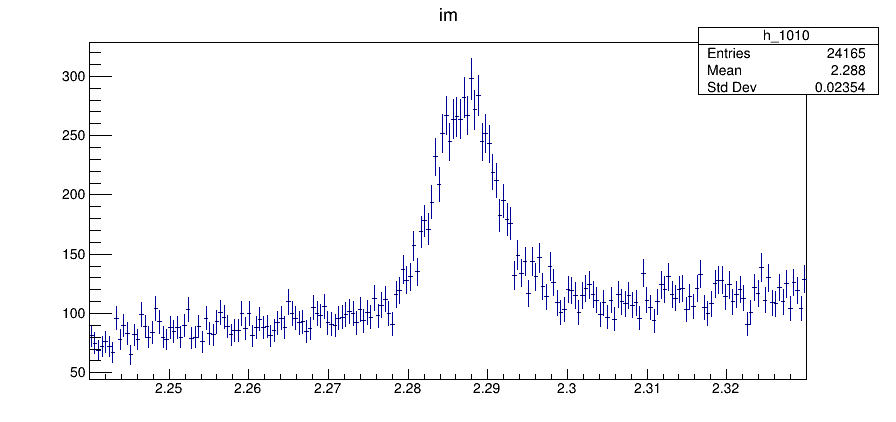

In [2]:
canv = ROOT.TCanvas("canv","canv",900,450)
im  = ROOT.RooRealVar("im" ,"im" , 2.24, 2.33)
lgi = ROOT.RooRealVar("lgi","lgi",-2.50, 2.50)
arg_set = ROOT.RooArgSet(im, lgi)
cut = "im>2.24 && im<2.33 && lgi>-2.5 && lgi<2.5 && NNp>0.5"
rfile = ROOT.TFile("test_file.root","READ")
rfile.ls()
small_ds = rfile["ds_k"].reduce( arg_set, cut)
small_ds.draw("im")
canv.Draw()

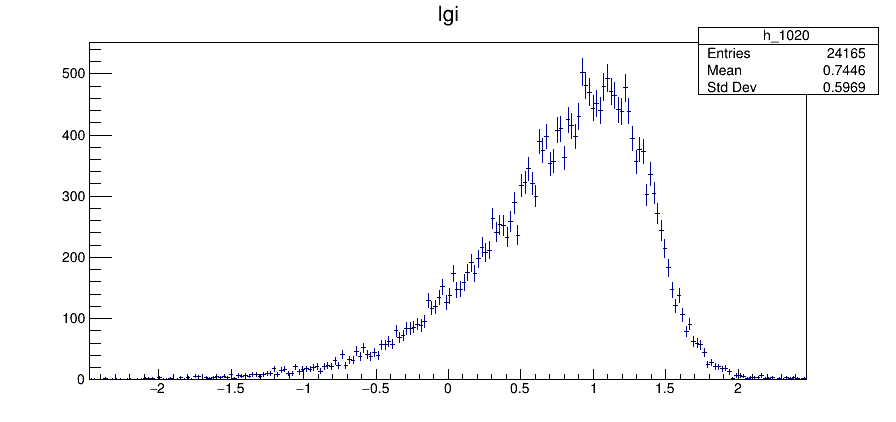

In [3]:
small_ds.draw("lgi")
canv.Draw()

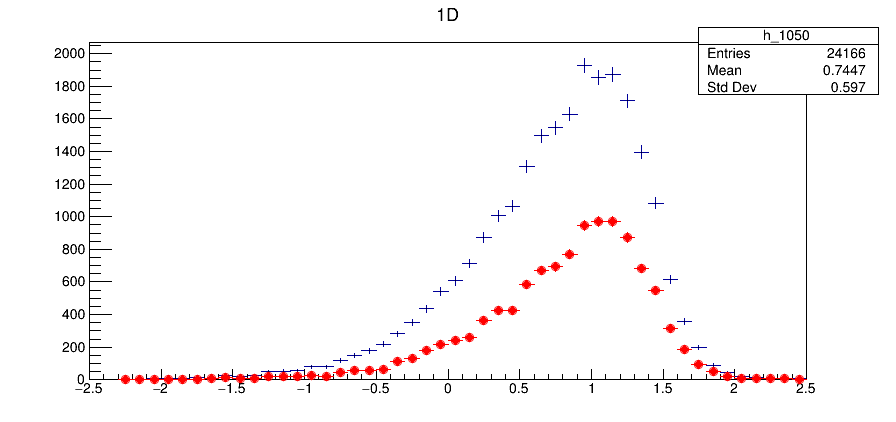

In [6]:
lgi_bins = []
LGI = 50
for i in range(LGI+1):
    lgi_bins.append(-2.5 + 5.*i/LGI)
h_lgi = h1_axis( lgi_bins )
h_sb = h1_axis(lgi_bins).red()
for entry in small_ds:
    h_lgi.Fill(entry.lgi)
    if entry.im<2.265 or entry.im>2.305:
        h_sb.Fill(entry.lgi)
h_lgi.Draw()
h_sb.Draw("same")
canv.Draw()


  RooFitResult: minimized FCN value: -279452, estimated distance to minimum: 1.50685e-05
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
                     B    1.0000e+00    2.0081e+04 +/-  1.80e+02  0.558160
                     S    1.0000e+00    4.0852e+03 +/-  1.28e+02  0.717331
              asym_sig    0.0000e+00   -5.6475e-02 +/-  6.19e-02  0.950006
              beta_sig    1.0000e+00    1.6864e+00 +/-  5.32e-01  0.948170
              mean_sig    2.2870e+00    2.2870e+00 +/-  3.54e-04  0.949440
             sigma_sig    4.5000e-03    3.5893e-03 +/-  2.58e-04  0.934202
               tau_bkg    0.0000e+00    4.3746e+00 +/-  2.78e-01  0.181397




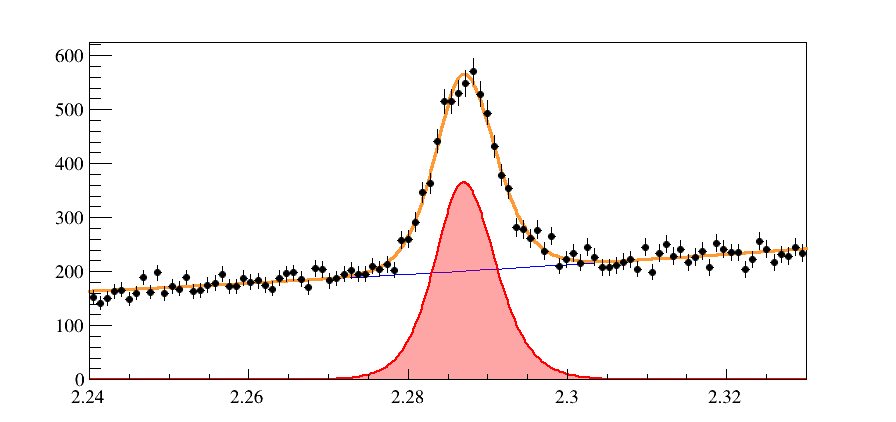

In [12]:
sig = Models.Apollonios2_pdf("sig",xvar=im,mean=(2.287,2.286,2.289),sigma=(0.0045,0.003,0.008),asymmetry=(0.,-0.1,0.1),beta=(1,0.1,20.))
bkg = Models.Bkg_pdf("bkg", xvar=im, power=0)
model = Models.Fit1D(signal=sig, background=bkg)
small_dh = small_ds.reduce(ROOT.RooArgSet(im)).binnedClone()
r,w = model.fitTo(small_dh, draw=True, silent=True)
print(r)
w.Draw()
canv.Draw()


  RooFitResult: minimized FCN value: -279452, estimated distance to minimum: 1.97225e-05
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Constant Parameter    Value     
  --------------------  ------------
              asym_sig   -5.6475e-02
              beta_sig    1.6864e+00
              mean_sig    2.2870e+00
             sigma_sig    3.5893e-03
               tau_bkg    4.3746e+00

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
                     B    2.0081e+04    2.0082e+04 +/-  1.58e+02  0.323785
                     S    4.0852e+03    4.0838e+03 +/-  9.44e+01  0.323785




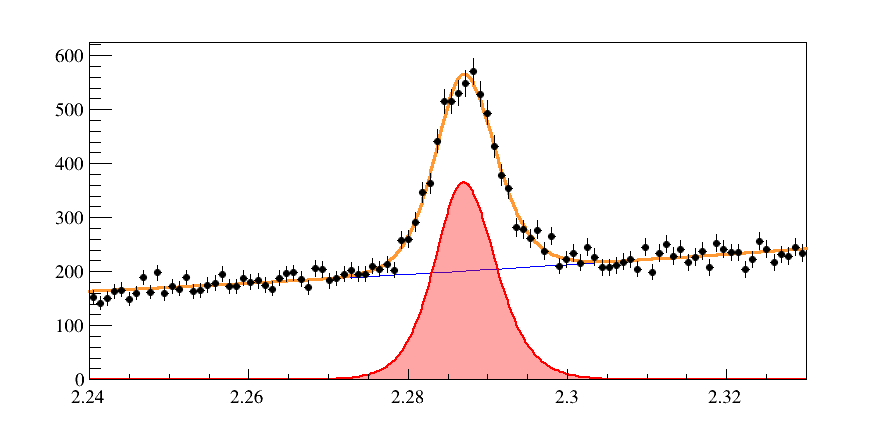

In [14]:
model.signal.mean.fix()
model.signal.sigma.fix()
model.signal.asym.fix()
model.signal.beta.fix()
model.background.tau.fix()
r,w = model.fitTo(small_ds, draw=True, silent=True)
print(r)
w.Draw()
canv.Draw()

In [15]:
model.sPlot( small_ds )

<ROOT.RooStats::SPlot object ("sPlot_1000") at 0x558372709d80>

In [16]:
print(small_ds)

+RooDataSet("ds_1000","Ostap.Selectors/ds_1000 "):24166 entries, 6 variables--+
|   Variable    |  Description  |   mean   |   rms    |     min     |   max   |
+---------------+---------------+----------+----------+-------------+---------+
| 1. B_sw       | B_sw          | +0.83101 | 0.58317  |    -0.31997 | +1.2402 |
| 2. L_B        | L_B           |  +11.237 | 1.1498   |     +9.0672 | +13.442 |
| 3. L_S        | L_S           |  +20.516 | 32.984   | +9.9017e-08 | +99.197 |
| 4. S_sw       | S_sw          | +0.16899 | 0.58312  |     -0.2402 | +1.32   |
| 5. im         | im            |  +2.2879 | 0.025437 |       +2.24 | +2.33   |
| 6. lgi        | lgi           | +0.74469 | 0.59702  |     -2.4785 | +2.472  |
+---------------+---------------+----------+----------+-------------+---------+


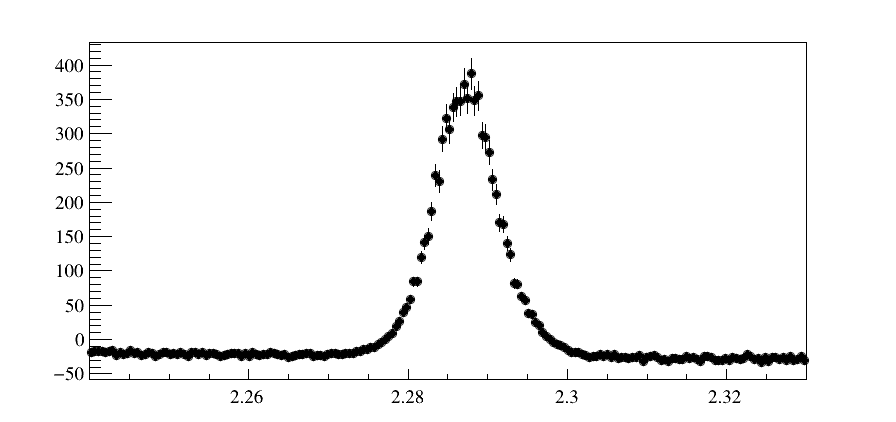

In [17]:
small_ds.draw("im","S_sw")
canv.Draw()

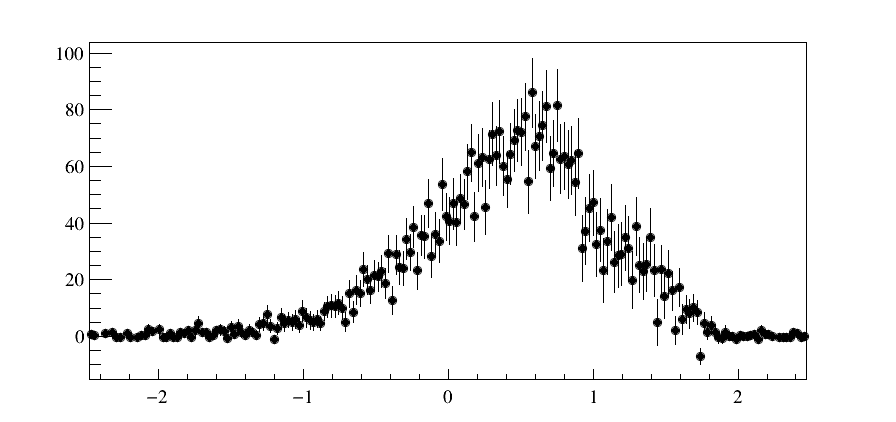

In [18]:
small_ds.draw("lgi","S_sw")
canv.Draw()